In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px

pinguins = sns.load_dataset('penguins')
pinguins.info()

# remove todas as linhas com valor nulo (null values)
df = pinguins.dropna()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


C:\Users\Priscila\AppData\Local\Temp\ipykernel_14056\4129124699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = pinguins.species


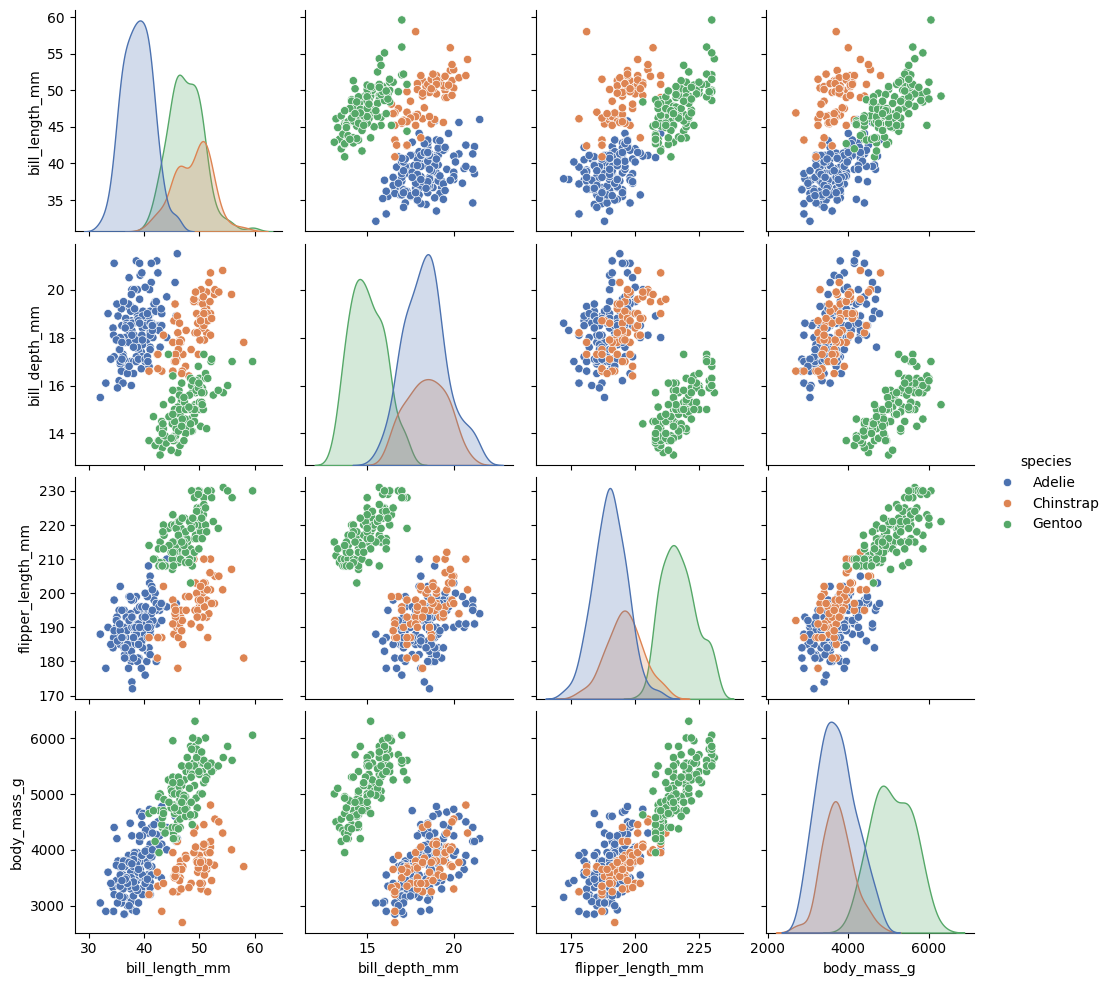

In [3]:
df['species'] = pinguins.species
sns.pairplot(df, hue='species', palette="deep")

<Axes: >

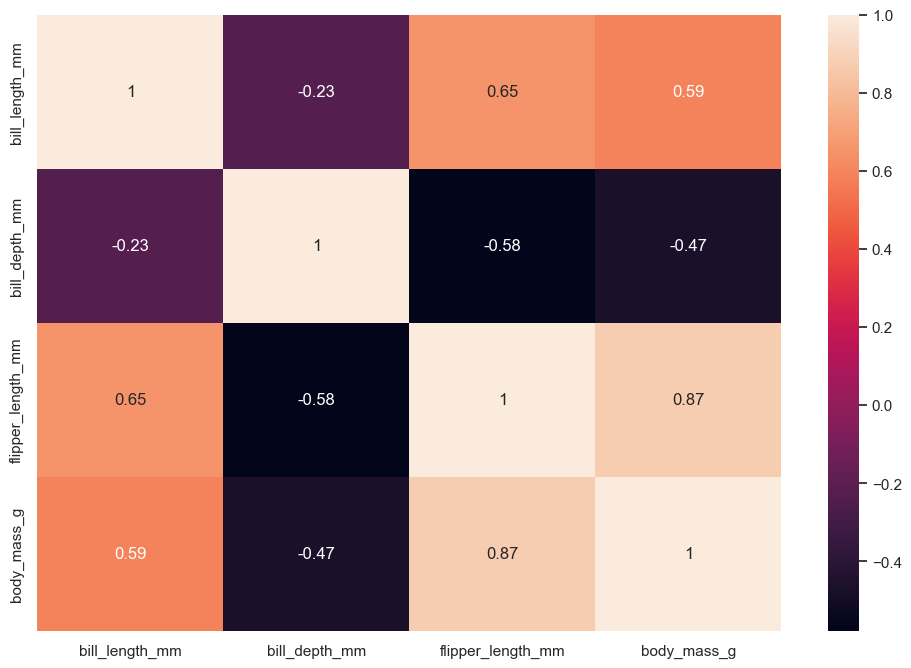

In [4]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.iloc[:,2:-1].corr(), annot=True)

In [5]:
encoder = LabelEncoder()
especies = encoder.fit_transform(df.iloc[:,0:1])
print(especies)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


C:\Users\Priscila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


333


<Axes: title={'center': '2D com correção de escala'}>

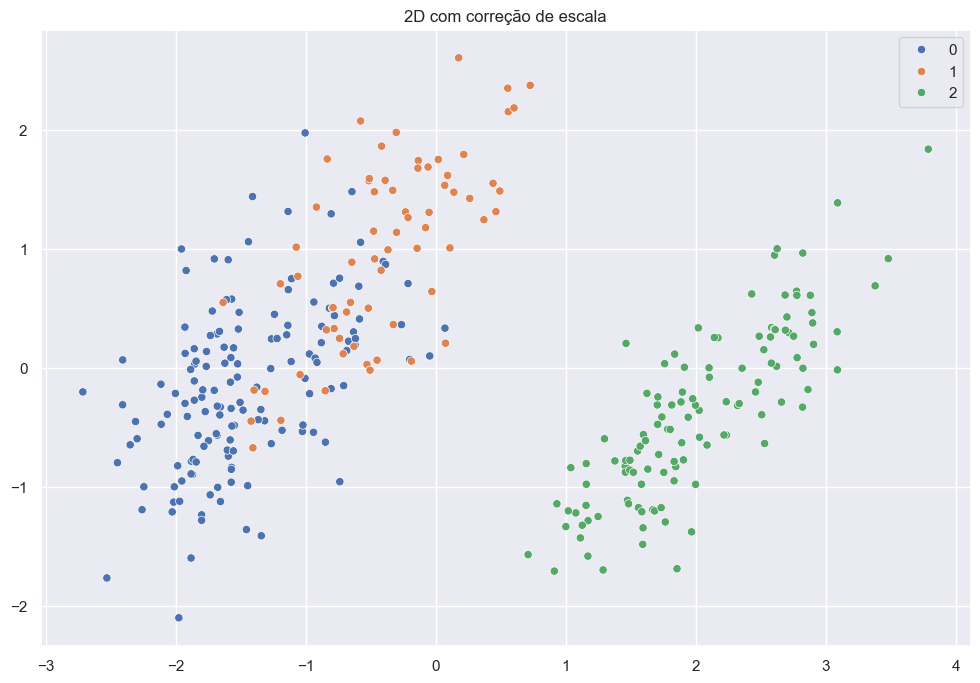

In [6]:
scaler = StandardScaler()
padronizado = scaler.fit_transform(df.iloc[:,2:-1])
pca = PCA(n_components=2)
dados = pca.fit_transform(padronizado)
print(len(dados))
plt.title("2D com correção de escala")
sns.scatterplot(x=dados[:,0], y =dados[:,1], hue=especies, palette="deep")

In [7]:
pca = PCA(n_components=3)
dados = pca.fit_transform(padronizado)
px.scatter_3d(x=dados[:,0], y=dados[:,1], z=dados[:,2], color=especies, title="3D com correção de escala")


333


<Axes: title={'center': '2D sem correção de escala'}>

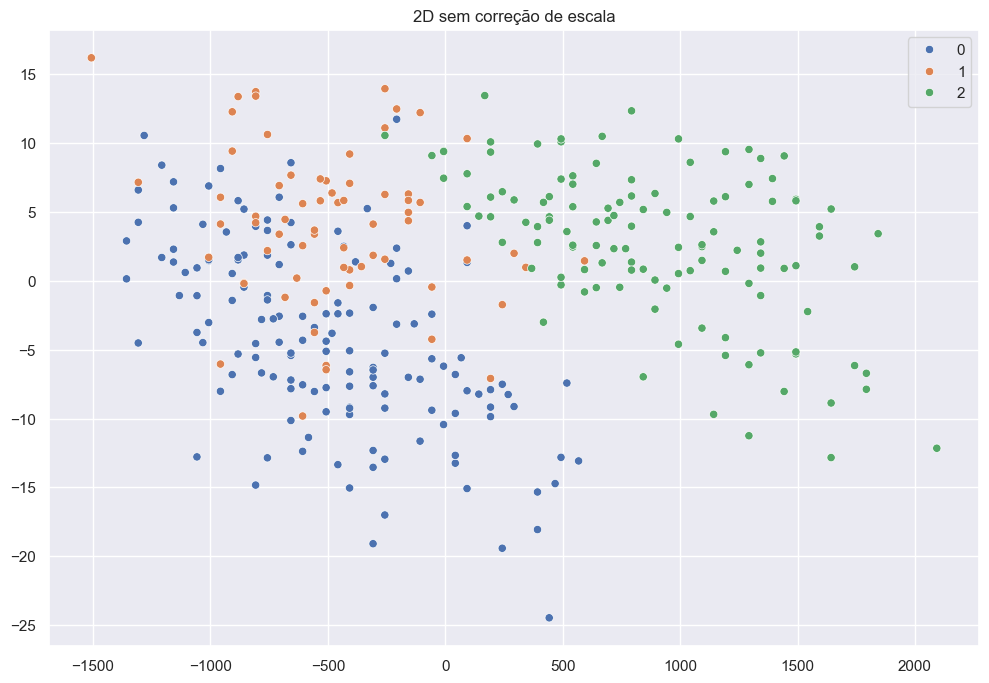

In [8]:
pca = PCA(n_components=2)
dados = pca.fit_transform(df.iloc[:,2:-1])
print(len(dados))
plt.title("2D sem correção de escala")
sns.scatterplot(x=dados[:,0], y =dados[:,1], hue=especies, palette="deep")


In [9]:
# o mesmo é feito para o tridimensional
pca = PCA(n_components=3)
dados = pca.fit_transform(df.iloc[:,2:-1])
px.scatter_3d(x=dados[:,0], y=dados[:,1], z=dados[:,2], color=especies, title="3D sem correção de escala")